In [20]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import AbsErrorCalculator
from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels

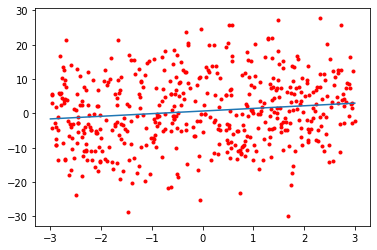

In [21]:
f, points = generate_regression(point_count=500, scale=np.array([3, 10]))

visualize_regression_point(f, points, scale=3)

In [22]:
storage = BenchmarkStorage()

# SGD

[0.42536273 0.34465243]
Benchmark results for config <('sgd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.146524
Mean memory:0.0B
Mean SMAPE value:0.42535602049808
Mean RMSE value:10.103994305036947
Mean logcosh value:4.036220553998734
Mean gradient calls:939.0
Iterations done:939.0


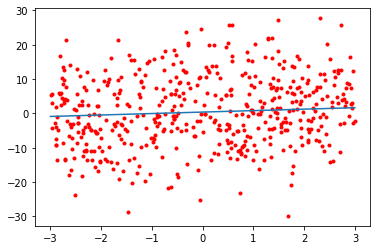

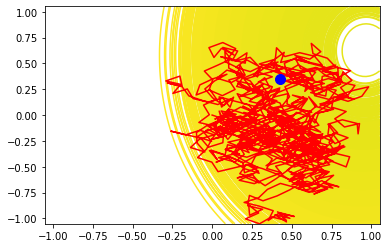

In [23]:
index = storage.add_benchmark_config()
ab, meta = sgd(points)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `1` вызов градта за итерацию
* Точность плохая т.к. один градиент из суммы описывает очень плохо градиент суммы
* Градиент м/у итерациями сильно "прыгает"

# Minibatch GD
batch size = `[10, 50, 100]`

## 10

[ 0.53412515 -0.19950403]
Benchmark results for config <('mini10', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.050458
Mean memory:0.0B
Mean SMAPE value:0.33429689414021213
Mean RMSE value:10.11744423647546
Mean logcosh value:3.1587820991856854
Mean gradient calls:1120.0
Iterations done:112.0


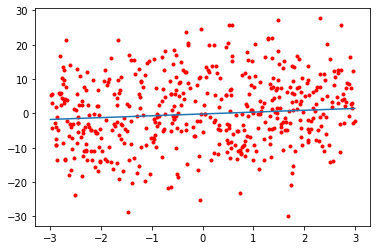

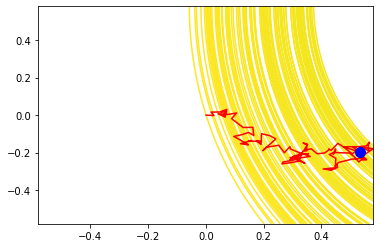

In [32]:
index = storage.add_benchmark_config(batch_size='mini10')
ab, meta = minibatch_gd(points, batch_size=10, eps=4e-2)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

## 50

[ 0.51123395 -0.07483152]
Benchmark results for config <('mini50', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.855127
Mean memory:0.0B
Mean SMAPE value:0.34952157423931246
Mean RMSE value:10.111159630282774
Mean logcosh value:3.336630167195977
Mean gradient calls:19900.0
Iterations done:398.0


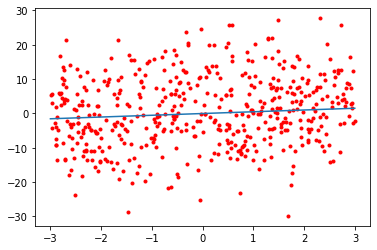

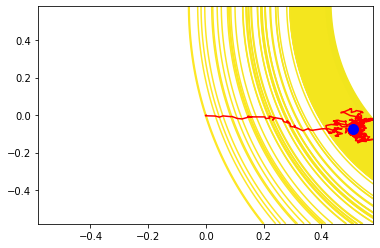

In [35]:
index = storage.add_benchmark_config(batch_size='mini50')
ab, meta = minibatch_gd(points, batch_size=50, eps=1e-2)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

## 100

[ 0.52724967 -0.07982766]
Benchmark results for config <('mini100', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.916875
Mean memory:0.0B
Mean SMAPE value:0.33863912865729534
Mean RMSE value:10.109434197194714
Mean logcosh value:3.2093504700386943
Mean gradient calls:21500.0
Iterations done:215.0


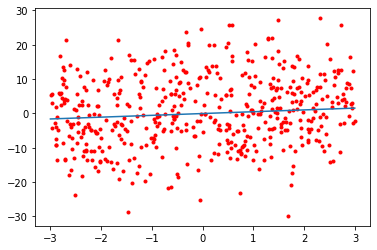

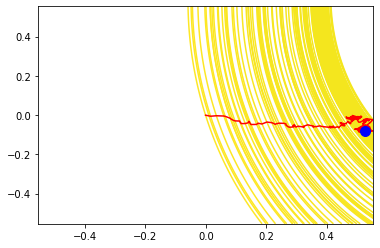

In [44]:
index = storage.add_benchmark_config(batch_size='mini100')
ab, meta = minibatch_gd(points, batch_size=100, eps=8e-3)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `k` вызовов градта за итерацию
* Точность лучше т.к. `k` градиентов из суммы лучше описывает градиент суммы
* Градиент м/у итерациями меньше "прыгает"/почти не "прыгает"

# GD

[ 0.5219213  -0.04643592]
Benchmark results for config <('gd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:2.186965
Mean memory:0.0B
Mean SMAPE value:0.3422047778572098
Mean RMSE value:10.107890407792466
Mean logcosh value:3.2510429818345745
Mean gradient calls:64000.0
Iterations done:128.0


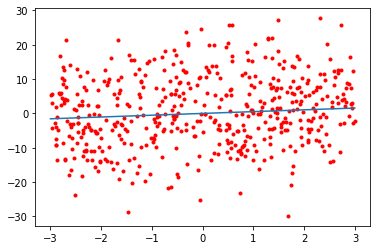

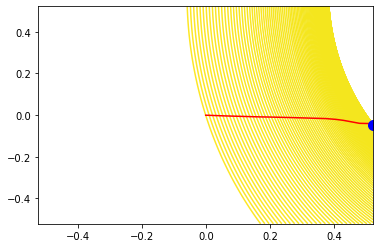

In [48]:
index = storage.add_benchmark_config(batch_size='gd')
ab, meta = gd(points, eps=5e-3)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `n` вызовов градта за итерацию
* Точность лучше т.к. градиент всей функции
* Градиент м/у итерациями меньше "прыгает"/почти не "прыгает"

# Benchmark

In [49]:
batch_sizes = [1, 10, 25, 100, 250, 500]

result = np.array([])
for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):
    index = storage.add_benchmark_config(batch_size=str(batch_size))
    for _ in range(20 if batch_size != len(points) else 1):
        ab, meta = minibatch_gd(points, batch_size=batch_size, eps=5e-2)
    storage.add_benchmark_result(index, meta)
    result = np.append(result, storage.get_benchmark_results_arrayed(index))

result

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

array([('1', 1, Default(no) optimization, Squared error calculator),
       1.523687, '0.0B', 0.41068258418338144, 10.131894927150151,
       3.998004576319792, 10000.0, 10000.0,
       ('10', 1, Default(no) optimization, Squared error calculator),
       0.026837, '0.0B', 0.3499808456255293, 10.107778612991618,
       3.334148780455221, 660.0, 66.0,
       ('25', 1, Default(no) optimization, Squared error calculator),
       0.057549, '0.0B', 0.36737214784734035, 10.105490788045246,
       3.486694032336738, 1575.0, 63.0,
       ('100', 1, Default(no) optimization, Squared error calculator),
       0.206638, '0.0B', 0.37463634539257673, 10.115712481362948,
       3.6141768441931723, 6400.0, 64.0,
       ('250', 1, Default(no) optimization, Squared error calculator),
       0.410076, '0.0B', 0.4250012185396472, 10.12376712075959,
       4.123253722592723, 13500.0, 54.0,
       ('500', 1, Default(no) optimization, Squared error calculator),
       0.81129, '0.0B', 0.4207157387955862, 10

In [50]:
result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.1.csv", sep='\t')
df

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(1, 1, Default(no) optimization, Squared error...",1.523687,0.0B,0.410683,10.131895,3.998005,10000.0,10000.0
1,"(10, 1, Default(no) optimization, Squared erro...",0.026837,0.0B,0.349981,10.107779,3.334149,660.0,66.0
2,"(25, 1, Default(no) optimization, Squared erro...",0.057549,0.0B,0.367372,10.105491,3.486694,1575.0,63.0
3,"(100, 1, Default(no) optimization, Squared err...",0.206638,0.0B,0.374636,10.115712,3.614177,6400.0,64.0
4,"(250, 1, Default(no) optimization, Squared err...",0.410076,0.0B,0.425001,10.123767,4.123254,13500.0,54.0
5,"(500, 1, Default(no) optimization, Squared err...",0.81129,0.0B,0.420716,10.120972,4.073024,26500.0,53.0
